# 5 - Muitas Variáveis e os Waffles Espúrios

Nosso objetivo nessa parte é começar o processo da construção de modelos de regressões múltiplas e, assim, também começaremos a criar as bases para o `framework de inferências causais`.

Para iniciarmos a discussão iremos introduzir um exemplo empírico, ou seja, um exemplo baseado na experiência e observações, sejam elas baseadas em algum método (*metódicas*) ou não.

<img src="./images/waffle_house.jpeg" alt="Waffle House" width=1000 />

[Fonte](https://br.linkedin.com/company/waffle-house)


[Aula - Statistical Rethinking Winter 2019 Lecture 05](https://www.youtube.com/watch?v=e0tO64mtYMU)

A *waffle house* é uma cadeia de restaurantes com mais de $2000$ locais em $25$ estados nos EUA (mapa amarelo abaixo). A maioria das suas localizações está no Sul do país e é um item da cultural e regional norte americana. (*[wikipedia](https://en.wikipedia.org/wiki/Waffle_House)*). Uma das particularidades dessa rede de restaurantes é que eles trabalham 24 horas. Nunca fecham! Essa é a proposta de negócio deles.

Um outro fato importante e desagradável que se surge no sul dos EUA são os *Furacões*. Esses são causados pelas depressões tropicais climáticas do pais. Os restaurantes da rede Waffles são um dos únicos estabelecimentos que continuam abertos nesses períodos turbulentos. *Exceto quando esses furacões atingem uma de suas lojas.*

A rede é tão confiável que governadores dos EUA criaram o `waffle house index`, internamente na FEMA (*agência federal de gestão de emergências*). Usada como uma métrica informal com o nome da rede de restaurantes, pretendem  determinar o efeito das tempestades, como uma escala auxíliar para o planejamento de recuperação de um desastre. (*[waffle house index](https://en.wikipedia.org/wiki/Waffle_House_Index)*)

<img src="./images/WH_per_people.png" alt="waffle house map" width=900 />

Imagem - https://www.scottareynhout.com/blog/2017/10/7/waffle-house-map

Além dos desastres naturais, existem também muitas outras coisas acontecendo em grande escala no sul dos EUA, tal como **divórcios**!

No gráfico abaixo temos a indicação da quantidade de divórcios nos EUA. Observe o sul do país e compare com o mapa acima.

<img src="./images/WH_per_divorce.png" alt="Waffle House contry-level-marriage-divorce-data-2010" width=900 />

Imagem - https://www.bgsu.edu/ncfmr/resources/data/original-data/county-level-marriage-divorce-data-2010.html

Percebeu? 

Em ambos os mapas existem uma grande concentração, no extremo do sul do mapa, de restaurantes da rede Waffle House e, subindo mais ao norte do país, temos quantidades cada vez menores. O mesmo ocorre no mapa das *taxas de divórcios*, quando olhamos para os mesmos locais no mapa.

Podemos então fazer uma estimativa: `esses dados estão correlacionados entre si`. E podemos nos ser levados a pensar que quanto maior a concentração de restaurantes na região maior seria seria a taxa de divórcios.

E por que isso acontece? 

Pelo seguinte motivo: `Por nada`! 

Isso mesmo, nada!!!

Não existe nada que tenha uma relação direta na qual a quantidade de restaurantes da rede em alguma determinada região influencie casais a brigarem e tomarem a decisão de se separar! 

É estranho. É cômico. É intrigante. Isso é uma `Correlação Espúria`!

# Correlações Espúrias

Essas são as `correlações espúrias`, ou seja, `correlações sem certeza`; que não é verdadeira nem real; é hipotética!

Muita coisa está relacionada com as outras no mundo real. `Isso é a Natureza`!

Por exemplo, se quisermos, por qualquer motivo que seja, arrumar um "argumento" para enfraquecer a imagem da rede Waffle House, "podemos" usar essas correlações espúrias com um dos argumentos. Assim, nós iriamos expor na mídia a seguinte manchete: 

```{admonition} Breaking News:
Pesquisadores [da universidade xyz] indicam que: o aumento do número de restaurantes da rede Waffle House 
na região implica num aumento assustador no número de divórcios nessa mesma região!
```


Isso soa estranho, eu sei! Esse é apenas um exemplo extremo.

Mas, lá no fundo, esse tipo de pensamento não soa tão estranho no dia-a-dia...

Existem diversas correlações espúrias no mundo. Muita coisa tem correlação com muitas outras coisas.


```{admonition} Entretanto:
Essas correlações não implicam causalidade.
```

Mas para entendermos melhor, vamos ver mais alguns exemplos sobre essas correlações espúrias:


- O consumo de queijo tem uma correlação de $94.7\%$ com os acidentes fatais com o emaranhado do lençol de cama. 


- O consumo per capita de frango apresenta uma correlação de $89\%$ com a importação de petróleo.


- Os acidentes por afogamentos em piscina tem a correlação de $66\%$ com o número de filmes lançados pelo Nicolas Cage, por ano. Veja graficamente essa correlação abaixo:


<img src="./images/chart.jpeg" alt="Tyler Vigen spurious correlations" width=1000>




Percebeu?

Se o consumo de frango diminuísse, a importação provavelmente não sofreria nenhum impacto por essa causa. E, caso o consumo de queijo diminuir, também não haverá uma diminuição nos acidentes fatais das pessoas que estão dormindo em suas camas. E, como é esperado, se o Nicolas Cage se aposentar dos cinemas, os acidentes por afogamento continuarão constantes. 

```{tip}
Correlação não implica causalidade!
```



Por fim, ter mais lojas da rede Waffle House não `causa` mais divórcios na região.



----
Mais correlações espúrias, tais como essas acima, podem ser encontradas no site do [Tyler Vigen](https://www.tylervigen.com/spurious-correlations).


-----

Entendido essa parte, vamos ao objetivo desse capítulo.


# Regressão Múltiplas

Vamos ver como construir um modelo de regressão linear novamente. Mas dessa vez iremos ver também como se faz com  `múltiplas variáveis` e quais são suas implicações. 

## Prós e contras das múltiplas variáveis:

- A parte boa desse tipo de modelo é que as regressões múltiplas podem não só revelar correlações espúrias como também podem revelar associações escondidas que nós não faríamos normalmente, ou seja, não teríamos visto essas associações usando o modelo com uma simples variável preditora.


- Mas, por outro lado, podemos também adicionar variáveis explicativas aos modelos que contenham correlações espúrias à regressão múltipla e, podem também, esconder as algumas das reais associações que existem.


Então, como essas coisas geralmente não são bem explicadas, vamos detalhar todo o processo de construção de uma regressão múltipla, a seguir.

Quando construímos um modelo usando uma regressão múltipla, nós devemos ter uma estrutura mais profusa para pensar sobre as nossas decisões. Apenas *jogar* todas as variáveis explicativas dentro da regressão múltipla, como usualmente é feito, é o segredo para o fracasso da análise e nós não queremos fazer isso!

Para isso precisamos de uma estrutura mais ampla e rica para conseguirmos pensar e tomar melhores decisões. Essa estrutura é o `framework de inferência casual`.

Nessa parte iremos aprender do básico sobre inferência casual:

- Grafos acíclicos direcionados (DAGs - *Directed acyclic graphs*)


- Fork, pipes, colliders...


- Critério de Backdoor.

Já sabemos que o Waffle House não causa os divórcios. Mas o que causa os divórcios?

Já vimos no mapa acima que divórcios do sul do país tem uma taxa bem mais alta do que no restante mais ao norte. Existem muitos esforços para tentar identificar as causas e as taxas de divórcios. Sabemos que no sul tem uma predominância religiosa quando comparada ao restante do país. Isso deixa os cientistas com certas desconfianças.

Existem assim muitas coisas que estão correlacionadas com a taxa de divórcios. Uma delas é a `taxa de casamentos`. Também podemos usar essas informações para cada um dos outros $50$ estados do país. Todos eles têm uma `correlação positiva` da taxa de casamentos com a taxa de divórcios.

Um ponto importante nessa correlação é que *só pode acontecer um divórcio se houver o casamento*! 

Mas a correlação entre essas taxas podem ser também `correlações espúrias`. Assim como a correlação entre homicídos e divórcios são uma correlação espúria.

Pois uma taxa alta de casamentos pode indicar que a sociedade vê o casamento de modo favorável e isso pode significar taxas de divórcios mais baixas. Não necessariamente faz sentido, mas pode ser que as taxas de casamentos e de divórcios sejam correlações espúrias também. 

```{note}
- Correlação não implica Causalidade


- Causalidade não implica Correlação


- Causalidade implica em correlação condicional
```


Assim, precisamos mais do que apenas simples modelos! É necessário um estrutura mais robusta.


Mas, o que causa os divórcios? 

Vamos descobrir isso...

Existe outra variável que também é correlacionada com a variável `taxa de divórcio`, é a variável `idade mediana das pessoas que se casam, em cada estado`. Mas diferente da `taxa de casamento`, essa variável apresenta uma *correlação negativa*.

In [1]:
import numpy as np
import pandas as pd
import stan
import nest_asyncio
import matplotlib.pyplot as plt

In [2]:
# Definindo o plano de fundo cinza claro para todos os gráficos feitos no matplotlib
plt.rcParams['axes.facecolor'] = 'lightgray'

In [3]:
# Desbloqueio do asyncIO do jupyter
nest_asyncio.apply()

In [4]:
def HPDI(posterior_samples, credible_mass):
    
    # Calcula o maior intervalo de probabilidades a partir de uma amostra
    
    # Fonte: https://stackoverflow.com/questions/22284502/highest-posterior-density-region-and-central-credible-region
    sorted_points = sorted(posterior_samples)
    ciIdxInc = np.ceil(credible_mass * len(sorted_points)).astype('int')
    nCIs = len(sorted_points) - ciIdxInc
    ciWidth = [0]*nCIs
    
    for i in range(0, nCIs):
        ciWidth[i] = sorted_points[i + ciIdxInc] - sorted_points[i]
        HDImin = sorted_points[ciWidth.index(min(ciWidth))]
        HDImax = sorted_points[ciWidth.index(min(ciWidth))+ciIdxInc]

    return(HDImin, HDImax)

In [5]:
# ====================================
#   Lendo os dados da Waffle House
# ====================================

df = pd.read_csv('./data/WaffleDivorce.csv', sep=';')
df.head()

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage SE,Divorce,Divorce SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
0,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45
1,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00
2,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00
3,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26
4,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00


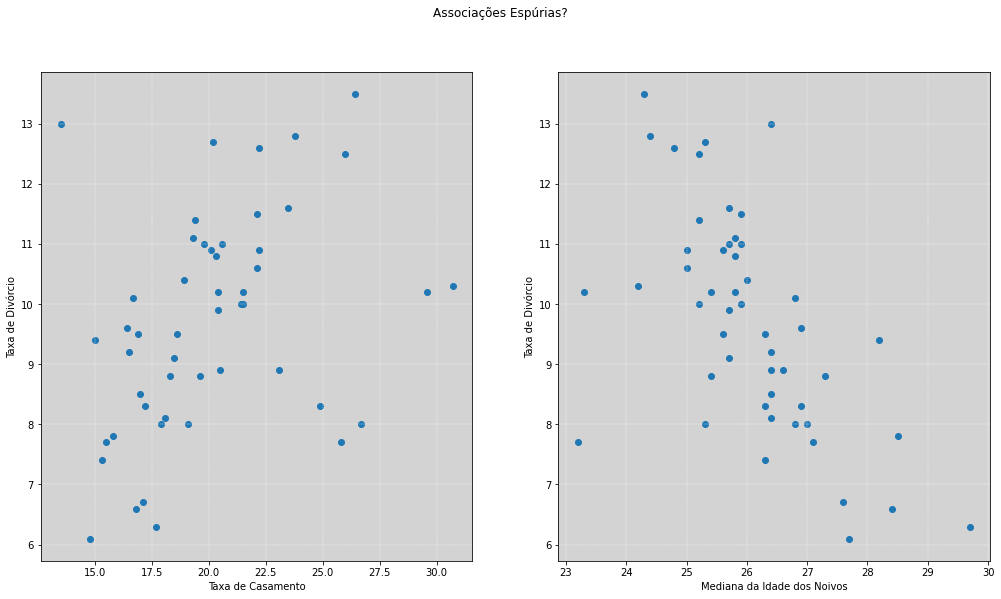

In [6]:
# ============================================
#  Plotando os dados das taxas de divórcios
# ============================================
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(17, 9))

plt.suptitle('Associações Espúrias?')

ax1.scatter(df.Marriage.values ,df.Divorce.values)
ax1.grid(ls='--', color='white', linewidth=0.4)
ax1.set_xlabel('Taxa de Casamento')
ax1.set_ylabel('Taxa de Divórcio')

ax2.scatter(df.MedianAgeMarriage.values ,df.Divorce.values)
ax2.grid(ls='--', color='white', linewidth=0.4)
ax2.set_xlabel('Mediana da Idade dos Noivos')
ax2.set_ylabel('Taxa de Divórcio')

plt.show()

Vamos construir modelos lineares simples para os dois gráficos acima.

In [7]:
# ========================================================
#  Construindo um modelo linear simples:
#
#    taxa de divórcio ~ alpha + beta * taxa_casamento
# ========================================================
divorce_model1 = """
    data {
        int N;
        vector[N] divorce_rate;
        vector[N] marriage_rate;
    }
    
    parameters {
        real alpha;
        real beta;
        real<lower=0, upper=50> sigma;
    }
    
    model {
        divorce_rate ~ normal(alpha + beta * marriage_rate, sigma);
    }
"""

my_data = {
    'N': len(df.Divorce),
    'marriage_rate': df.Marriage.values,
    'divorce_rate': df.Divorce.values,
}

posteriori1 = stan.build(divorce_model1, data=my_data)
fit1 = posteriori1.sample(num_chains=4, num_samples=1000)

alpha_1 = fit1['alpha'].flatten()
beta_1 = fit1['beta'].flatten()
sigma_1 = fit1['sigma'].flatten()

Building: found in cache, done.
Messages from stanc:
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_vek124sv/model_pa7jtmrb.stan', line 15, column 8 to column 67)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog ste

In [8]:
# ==============================================================
# Construindo um modelo linear simples:
#
#  taxa divorcio ~ alpha + beta * mediana da idade dos noivos
# ==============================================================

stan_model2 = """
    data {
        int N;
        vector[N] divorce_rate;
        vector[N] median_age_marriage;
    }
    
    parameters {
        real alpha;
        real beta;
        real<lower=0, upper=50> sigma;
    }
    
    model {
        divorce_rate ~ normal(alpha + beta * median_age_marriage, sigma);
    }
"""

my_data = {
    'N': len(df.Divorce),
    'divorce_rate': df.Divorce.values,
    'median_age_marriage': df.MedianAgeMarriage.values,
}

posteriori2 = stan.build(stan_model2, data=my_data)
fit2 = posteriori2.sample(num_chains=4, num_samples=1000)

alpha_2 = fit2['alpha'].flatten()
beta_2 = fit2['beta'].flatten()
sigma_2 = fit2['sigma'].flatten()

Building: found in cache, done.
Messages from stanc:
Sampling:   0%
Sampling:  10% (800/8000)
Sampling:  35% (2800/8000)
Sampling:  60% (4800/8000)
Sampling:  85% (6800/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 3.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_qfk_1nlw/model_y5ac3ihc.stan'

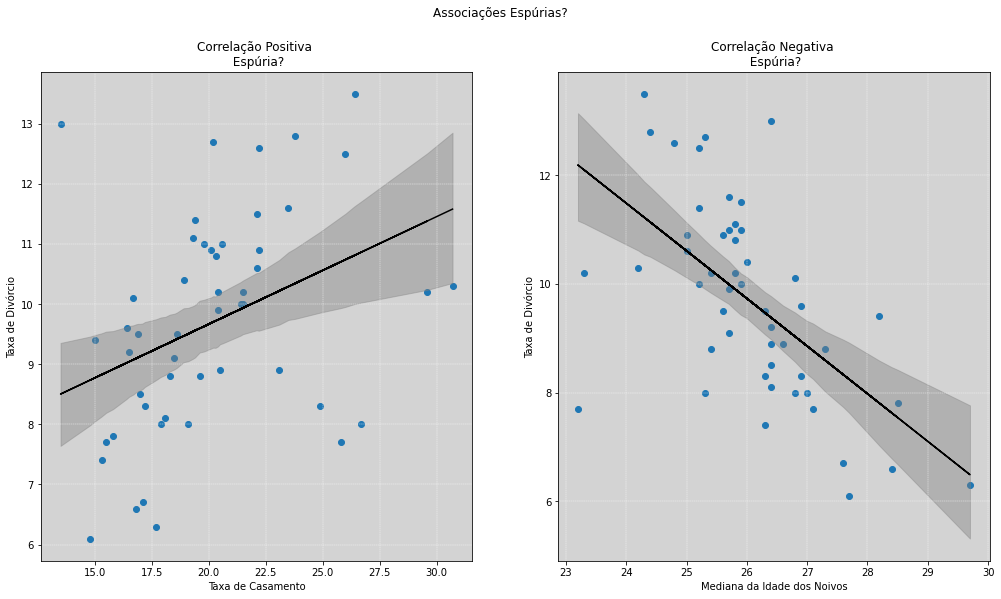

In [9]:
# ====================================================================
#  Plotando os dados das taxas de divórcios e suas estimativas médias
# ====================================================================
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(17, 9))

plt.suptitle('Associações Espúrias?')

# Calculando as regiões de HPDI para mu - Taxa de casamentos com 0.92 de credibilidade
range_mu = np.sort(df.Marriage)
posteriori_mu_aux = np.array([[alpha_1 + beta_1 * marriage for marriage in range_mu]])[0]
posteriori_mu_HPDI = np.array([[HPDI(posteriori_marriage, 0.92) for posteriori_marriage in posteriori_mu_aux]])[0]

# Gráfico de Divórcio x Casamento
ax1.scatter(df.Marriage.values ,df.Divorce.values)
ax1.fill_between(range_mu, 
                 posteriori_mu_HPDI[:, 0], posteriori_mu_HPDI[:, 1], 
                 color='gray', alpha=0.4)
ax1.plot(df.Marriage.values, 
         alpha_1.mean() + beta_1.mean() * df.Marriage.values,
         color='black')

ax1.grid(ls='--', color='white', linewidth=0.4)
ax1.set_xlabel('Taxa de Casamento')
ax1.set_ylabel('Taxa de Divórcio')
ax1.set_title('Correlação Positiva \n Espúria?')

# ------------

# Calculando as regiões de HPDI para mu - Mediana para idade de casamentos com 0.92 de credibilidade
range_mu = np.sort(df.MedianAgeMarriage)
posteriori_mu_aux = np.array([[alpha_2 + beta_2 * mediaAgeMarriage for mediaAgeMarriage in range_mu]])[0]
posteriori_mu_HPDI = np.array([[HPDI(posteriori_mediaAgeMarriage, 0.92) for posteriori_mediaAgeMarriage in posteriori_mu_aux]])[0]

# Gráfico de Divórcio x Mediana da Idade dos Casamentos
ax2.scatter(df.MedianAgeMarriage.values ,df.Divorce.values)
ax2.fill_between(range_mu, 
                 posteriori_mu_HPDI[:, 0], posteriori_mu_HPDI[:, 1], 
                 color='gray', alpha=0.4)

ax2.plot(df.MedianAgeMarriage.values, 
         alpha_2.mean() + beta_2.mean() * df.MedianAgeMarriage.values,
         color='black')

ax2.grid(ls='--', color='white', linewidth=0.4)
ax2.set_xlabel('Mediana da Idade dos Noivos')
ax2.set_ylabel('Taxa de Divórcio')
ax2.set_title('Correlação Negativa \n Espúria?')

plt.show()

Observando os dois gráficos acima, quais dessas correlações são `causas plausíveis`? 

No gráfico da esquerda, sabemos que a `taxa de casamento` tem uma associação direta com a `taxa de divórcio`, pois, para se divorciar é necessário antes ter casado. Mas essa interpretação dos fatos pode estar contaminada pelo nosso senso comum e, assim, uma associação espúria, nos seria válida. Um dos motivos pra isso acontecer é que em locais que possuem maiores incentivos religiosos e podem implicar em maiores incentivos para casamentos, podendo, assim, não haver uma causalidade direta com o divórcio.

Já no gráfico à direita, a `taxa de divórcio` está associada com `mediana das idades dos noivos`, nos apresentando uma associação negativa. Isso pode nos levar a pensar que jovens, ao se casarem, tomam decisões muito emotivas e que isso também levaria a altas taxas de divórcios. Ou pode ser que essa seja uma associação espúria e nossas hipóteses e nosso senso comum não tenha sentido.

Assim, mesmo que nossas justificativas sejam bastante `verossímeis` a respeito do comportamento da Natureza do evento, não podemos afirmar que essas associações não sejam espúrias.

Se a identificação de associações espúrias, como no exemplo de filmes do *Nicolas Cage*, `pareciam óbvias` de serem identificadas, agora, essas não parecem ser tão simples de perceber sua veracidade.

Portanto, é necessário construirmos um ferramental que nos permita identificar com mais facilidade e, com um maior grau de certeza, se essas associações são reais ou são espúrias.

O que queremos fazer agora é colocar essas duas variáveis no mesmo modelo e entender o que isso faz e por que nos revela, quase certamente, que determinada variável é uma `impostora`.

## Múltiplas causas de divórcios

<img src="./images/cidade1.jpg" alt="Aprender a taxa casamentos de uma cidade" />

[Fonte: *Hong Kong - wikipedia*](https://pt.wikipedia.org/wiki/Cidade#/media/Ficheiro:Hong_Kong_Night_Skyline.jpg)

Como entender o mecanismo das Causas Naturais de divórcio numa cidade grande, por exemplo?

O que nós queremos saber é qual o valor de uma `variável preditora`, uma vez que nós conhecemos os valores das outras variáveis preditoras corretamente?

Todas variáveis preditoras são ,em alguma extensão, correlacionadas com as outras variáveis preditoras e, também, com a variável resposta. Entretanto, elas têm `correlações parciais` que são reveladoras de informações adicionais dessa estrutura de correlação.

Para entendermos melhor, vamos exemplificar com nosso exemplo sobre divórcios.

Nós gostariamos de aprender mais sobre o valor da `taxa de casamentos`, uma vez que já conhecemos a `mediana da idade da taxa dos noivos`.

## Entendendo os grafos um pouco mais perto.

DAG's são o acrônimo para a expressão inglês `Directed Acyclic Graph`, o que é portugês é conhecido como `Grafos Acíclicos Direcionados` [(*ver mais em wikipedia*)](https://pt.wikipedia.org/wiki/Grafos_ac%C3%ADclicos_dirigidos).

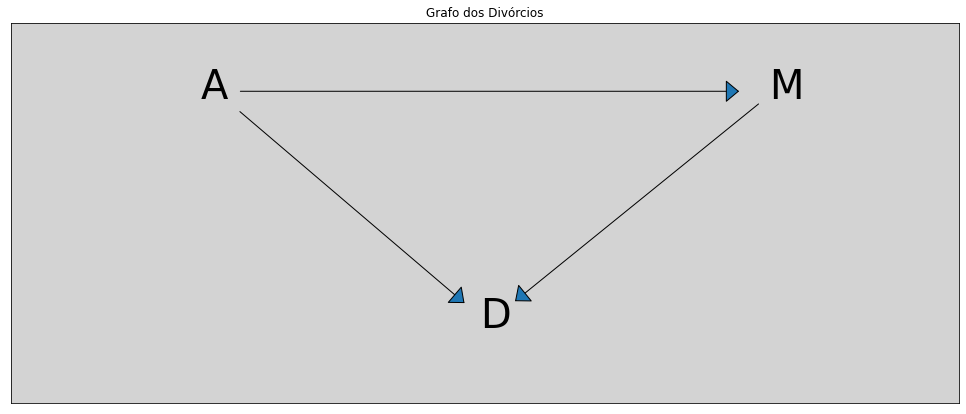

In [10]:
# =======================================
#   Construindo o desenho de um DAG 
# =======================================

# -----------------------------------------------------
# Obs: Os próximos grafos irei esconder os códigos, 
#      para ficar visualmente melhor. Mas, se quiser,
#      os códigos podem ser encontrados no github.
# -----------------------------------------------------

plt.figure(figsize=(17, 7))

plt.xlim(0, 1)
plt.ylim(0, 1)

size=40

plt.annotate('A', (0.2, 0.8), fontsize=size)
plt.annotate('M', (0.8, 0.8), fontsize=size)
plt.annotate('D', (0.495, 0.2), fontsize=size)

plt.title('Grafo dos Divórcios')

# Edge: M <---> D
plt.annotate("", 
             xytext=(0.79, 0.79), xy=(0.53, 0.265) ,
             arrowprops=dict(arrowstyle="-|>,  head_width=1, head_length=1.2"))

# Edge: A <---> M
plt.annotate("", 
             xytext=(0.24, 0.82), xy=(0.77, 0.82),
             arrowprops=dict(arrowstyle="-|>,  head_width=1, head_length=1.2"))

# Edge: A <---> D
plt.annotate("", 
             xytext=(0.24, 0.77), xy=(0.48, 0.26),
             arrowprops=dict(arrowstyle="-|>,  head_width=1, head_length=1.2"))


# Remover os valores dos eixos
plt.yticks([])
plt.xticks([])

plt.show()

DAG's são ferramentas heurísticas usadas no framework de inferências causais. Elas não como ferramentas mecânicas analíticas que já vimos, mas são *incrivelmente* úteis para nos auxiliar a pensar melhor e eventualmente também nos permite entender muito melhor os modelos mecânicos.

As setas do *DAG* apontam apenas em uma `direção` e essa direções indica uma `relação de causalidade` entre as variáveis analisadas, ou seja, indica que uma variável tem `influência direta` sobre a outra.

A ausência de *ciclos* significa que não existem *loops* na causalidade. Mas esses loops podem acontecer sobre o tempo, o que tornaria a análise também uma `série temporal`!

A representação desses problemas reais em estruturas como *DAG's* podem ser, realmente, muito grandes. Pois, assim, podemos descrever a estrutura no tempo $T$, $\{T_1, T_2, ...\}$, e assim por diante.

Nós, normalmente rotulamos os grafos por dois nomes: `nós` (*nodes*) e `arestas` (*edge*). (Iremos aqui, por conveção, usar os nomes em inglês.)

```{note}
Os nodes (nós) são as variáveis. Já os edges (as arestas) representam a relação causal entre os nodes.
```

 As associações que foram levadas em consideração, podem  ser incluídas dentro dos modelos de redes bayesianas, que são considerados parte do conjunto de ferramentas de *Machine Learning*. Esses modelos também não levam em consideração a causalidade, pois não existe um mecanismo interno nesses modelos que leve em consideração a direção da causalidade.

Já nos *DAG's*, tal mecanismo, existe!

```{note}
 Esse mecanismo nos permite a capacidade de enxergar, através das lentes probabilísticas, a influência da causa e efeito em diferentes eventos! Isso não é medir uma associação. É uma medida para a causalidade! 
```

E isso, faz `toda` a diferença! 


*Também veremos qual é a diferença entre as duas abordagens comnetadas...*

## Bons Grafos

Queremos saber a diferença entre esses dois grafos abaixo. O da esquerda tem um caminho direto de $A <-> M <-> D$ e, no outro gráfico, uma suposição de que temos que a relação causal entre a taxa de casamento ($M$) e a taxa de divórcio ($D$) não existe mais.

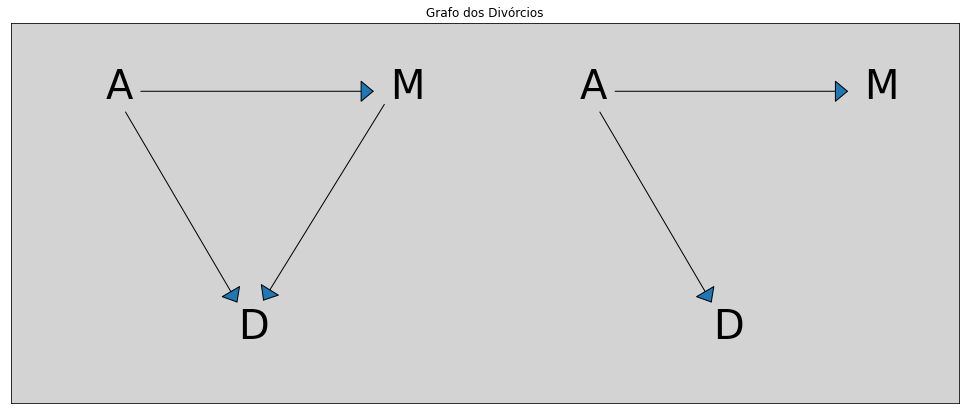

In [11]:
# =======================================
#   Construindo o desenho de um DAG 
# =======================================

# Esses códigos devem estar invisíveis no jupyter-book 

plt.figure(figsize=(17, 7))

plt.xlim(0, 2)
plt.ylim(0, 1)

size=40

#-------------------------
# DAG - Esquerda
#-------------------------

plt.annotate('A', (0.2, 0.8), fontsize=size)
plt.annotate('M', (0.8, 0.8), fontsize=size)
plt.annotate('D', (0.48, 0.17), fontsize=size)

plt.title('Grafo dos Divórcios')

# Edge: M <---> D
plt.annotate("", 
             xytext=(0.79, 0.79), xy=(0.53, 0.265) ,
             arrowprops=dict(arrowstyle="-|>,  head_width=1, head_length=1.2"))

# Edge: A <---> M
plt.annotate("", 
             xytext=(0.27, 0.82), xy=(0.77, 0.82),
             arrowprops=dict(arrowstyle="-|>,  head_width=1, head_length=1.2"))

# Edge: A <---> D
plt.annotate("", 
             xytext=(0.24, 0.77), xy=(0.48, 0.26),
             arrowprops=dict(arrowstyle="-|>,  head_width=1, head_length=1.2"))


#-------------------------
# DAG - Direita
#-------------------------

plt.annotate('A', (1.2, 0.8), fontsize=size)
plt.annotate('M', (1.8, 0.8), fontsize=size)
plt.annotate('D', (1.48, 0.17), fontsize=size)

plt.title('Grafo dos Divórcios')

# Edge: M <---> D
#lt.annotate("", 
#             xytext=(1.79, 0.79), xy=(1.53, 0.265) ,
#             arrowprops=dict(arrowstyle="-|>,  head_width=1, head_length=1.2"))

# Edge: A <---> M
plt.annotate("", 
             xytext=(1.27, 0.82), xy=(1.77, 0.82),
             arrowprops=dict(arrowstyle="-|>,  head_width=1, head_length=1.2"))

# Edge: A <---> D
plt.annotate("", 
             xytext=(1.24, 0.77), xy=(1.48, 0.26),
             arrowprops=dict(arrowstyle="-|>,  head_width=1, head_length=1.2"))

# Remover os valores dos eixos
plt.yticks([])
plt.xticks([])

plt.show()

Regressões Lineares, em princípio, podem nos dizer a diferença entre essas duas coisas. Mas uma regressão bivariada já não pode mais. Elas podem nos dar apenas algum conhecimento da associação entre *casamentos* e *divórcios*, mas não podem nos dizer qual a diferença entre esses dois *DAG's* acima. 

Mas, porque não? 

Por que, A tem influência tanto na taxa de casamentos ($A <-> M$) quanto em D ($A <-> D$), isso gera uma `correlação` entre os eventos *taxa de casamento* ($M$) e *taxa de divórcio* ($D$), mesmo que uma não influencie na outra, como no gráfico à direita. (*Elegante essa explicação, hein!*)

É um modo bonito de dizer:

```{warning}
Correlação não é Casualidade!
```

Essa mesmo estrutura do *DAG's*, pode ser modelada com as correlações espúrias do início do capítulo, *waffle House* vs *taxa de divórcios*

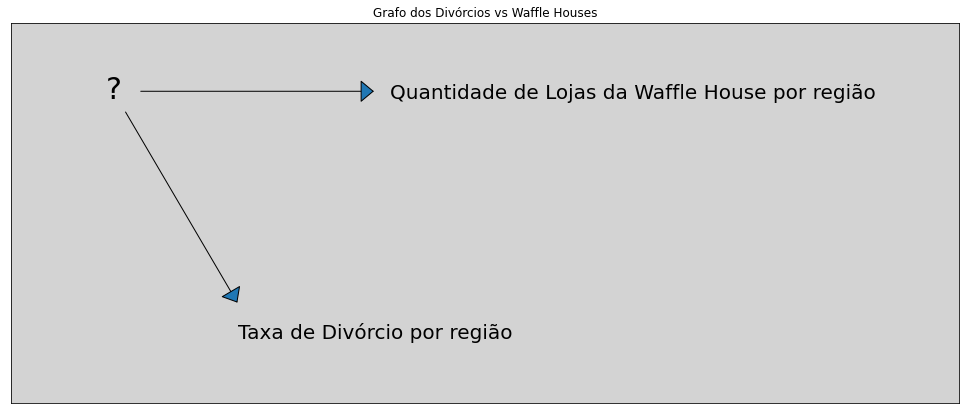

In [12]:
# =======================================
#   Construindo o desenho de um DAG 
# =======================================

# Esses códigos devem estar invisíveis no jupyter-book 

plt.figure(figsize=(17, 7))

plt.xlim(0, 2)
plt.ylim(0, 1)

size=20


plt.title('Grafo dos Divórcios vs Waffle Houses')


#-------------------------
# DAG - Direita
#-------------------------

plt.annotate('?', (0.2, 0.8), fontsize=size+10)
plt.annotate('Quantidade de Lojas da Waffle House por região', (0.8, 0.8), fontsize=size)
plt.annotate('Taxa de Divórcio por região', (0.48, 0.17), fontsize=size)


# Edge: ? <---> Haffle House
plt.annotate("", 
             xytext=(0.27, 0.82), xy=(0.77, 0.82),
             arrowprops=dict(arrowstyle="-|>,  head_width=1, head_length=1.2"))

# Edge: ? <---> Divórcio
plt.annotate("", 
             xytext=(0.24, 0.77), xy=(0.48, 0.26),
             arrowprops=dict(arrowstyle="-|>,  head_width=1, head_length=1.2"))

# Remover os valores dos eixos
plt.yticks([])
plt.xticks([])

plt.show()

A correlação que existe entre essas duas variáveis como foi visto anteriormente, tem sua origem na causa de algum outro evento que não conhecemos, rotulado por ($?$). Só sabemos que seu comportamento tem uma influência direta sobre a magnitude do efeito dos divórcios e da quantidade de lojas da rede de restaurantes tem por região.   


Então, se estamos tentando medir a ligação entre a taxa de casamentos ($M$) e a taxa de divórcios ($D$) usando, como sugestão, a estrutura o grafo da direita (*da figura acima*), teremos uma grande confusão. Pois  mais adiante uma definição melhor sobre essa confusão. 

Vamos rotular essa estrutura com a seguinte notação: 

$$ M <-> D | A $$

Significa que podemos conhecer a `associação` que $M$ e $D$ tem entre si, ($M <-> D$), condicionado ($|$, caracter chamado de *pipe*) a $A$.

Quando conhecemos o valor de $A$, então eu tenho um valor extra, uma associação externa, entre as duas variáveis. E é isso que a regressão múltipla pode pode nos dizer. 

$$ D_i \sim Normal(\mu_i, \sigma)$$

$$ \mu_i = \alpha + \beta_M M_i + \beta_A A_i $$

Onde:

- $D_i$: Taxa de divórcio

As taxas médias dos casamentos:

- $\beta_M$: A '*peso*' da taxa de casamentos

- $M_i$: A taxa média de casamentos


As as medianas das idades nos casamentos:


- $\beta_A$: A '*peso*' da mediana das idades dos casamentos

- $A_i$: Mediana das idades dos casamentos

Podemos ver que esse modelo tem uma certa diferença dos modelos que vimos anteriormente. Existe um $\beta$ para cada uma das variáveis preditoras. 

Essa regressão linear, é um tipo especial de *rede bayesiana*, associa a variável resposta ($D_i$) a uma distribuição gaussiana. E sua média ($\mu_i$) é dada pela variáveis já conhecidas e um desvio padrão ($\sigma$).

Então, nossa média será descrita como $\mu_i$, onde $i$, significa que condicionaremos os valores de $\mu_i$ para cada $i$. Aqui, no exemplo, cada $i$ indica um novo estado do sul dos EUA. E, assim, cada condicionamento será descrito pelos '*pesos*' multiplicado as suas próprias variáveis preditoras. 

## Prioris

Agora, nós iremos padronizar a variável *taxa de divórcio* ($D_i$), a variável *taxa de casamento* ($M_i$) e também a variável *mediana das idades dos casamentos*.

Assim, como esperamos, podemos escrever a priori para $\alpha$ da seguinte forma:

$$\alpha \sim Normal(0, 0.2)$$

Pois esperamos que $\alpha$ esteja próximo de zero!

E as prioris para os $\beta$'s da seguinte forma:

$$ \beta_M \sim Normal(0, 0.5)$$

$$ \beta_A \sim Normal(0, 0.5)$$

$$ \sigma \sim Exponential(1) $$

Pois todos os valores foram padronizados, e assim esperamos que a estimativa à priori seja próxima de zero.

In [13]:
# =============================
#   Padronizando as variáveis 
# =============================
M_stdr = (df.Marriage - df.Marriage.mean())/df.Marriage.std() 
D_stdr = (df.Divorce - df.Divorce.mean())/df.Divorce.std()
A_stdr = (df.MedianAgeMarriage - df.MedianAgeMarriage.mean())/df.MedianAgeMarriage.std()

In [14]:
# ===========================================================
#  Priori preditiva para Mediana das Idades dos Casamentos
# ===========================================================

range_A = np.linspace(A_stdr.min(), A_stdr.max())  # Range de valores da média de idade dos casamentos padronizados

qtd_amostras = 50  # Quantidade de amostras da priori preditiva

# Amostrando os valores de 𝜇𝑖 da priori
𝛼 = np.random.normal(0, 0.2, qtd_amostras)
𝛽_A = np.random.normal(0, 0.5, qtd_amostras)
𝜎 = np.random.exponential(1, qtd_amostras)  # Priori 𝜎 ~ Exp(1)

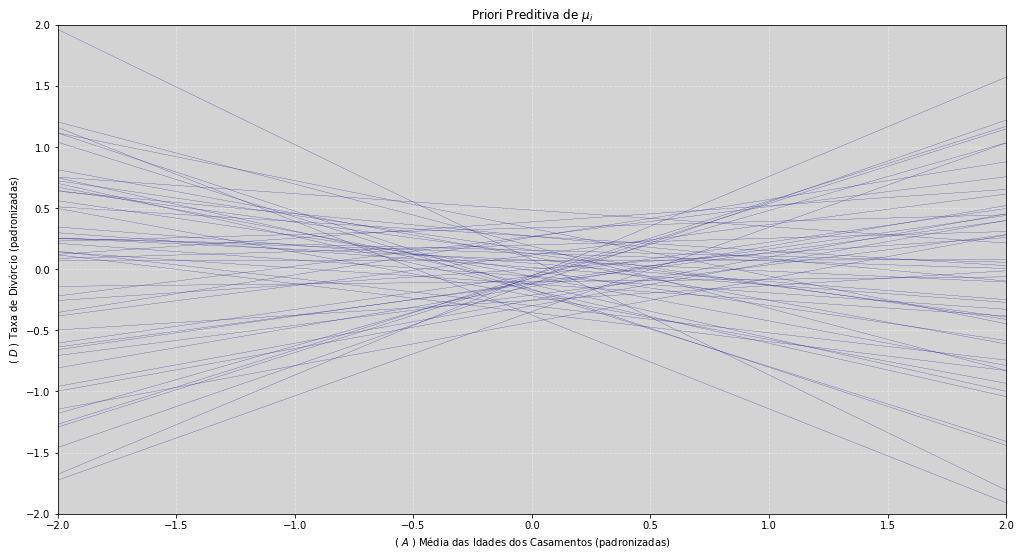

In [15]:
# ========================================
#   Gráfico da Priori Preditiva para 𝜇𝑖
# ========================================

𝜇 = [ 𝛼 + 𝛽_A * A_i for A_i in range_A ]  # Calculando 𝜇𝑖 = 𝛼 + 𝛽𝐴 * 𝐴𝑖, para todo 𝐴𝑖

# Plotando o gráfico 
plt.figure(figsize=(17, 9))

# Relembrando o DAG: A <-> D!
# Plotando as retas da posteriori para 𝜇𝑖
plt.plot(range_A, 𝜇, color='darkblue', linewidth=0.2)

plt.title("Priori Preditiva de $\mu_i$")
plt.xlabel("( $A$ ) Média das Idades dos Casamentos (padronizadas)")
plt.ylabel("( $D$ ) Taxa de Divórcio (padronizadas)")

plt.grid(ls='--', color='white', alpha=0.4)

# Ajustando os limites da visuzalização do gráfico.
plt.ylim((-2, 2))
plt.xlim((-2, 2))

plt.show()

Temos no gráfico acima a representação da nossa distribuição à priori do modelo de regressão linear. Sorteamos $50$ linhas dessa distribuição. Essa é a distribuição  à priori preditiva de $\mu_i$.  Ou seja, `isso é oque nosso modelo pensa sobre o problema, antes de darmos os dados à ele`.  

Temos que sempre fazer a simulação da priori preditiva. Só assim será possível entender uma importante característica presente em todos os modelo. Temos observar se a amplitude da priori faz sentido. Quando nós dermos os dados para o modelo, é necessário que as estimativas do modelo resida sobre distribuição à priori. Caso contrário, teremos uma priori ruim. Em cenários mais simples, e com muitos dados, esse efeito pode até passar despercebido e ajustar bem. Porém em cenários mais complexos, uma priori ruim poderá ser desastrosa!

```{note}
Sempre verifique a priori.
```

Vamos andar pelo gráfico para entendermos melhor suas partes. Iniciando pela `Média das Idades dos Casamentos padronizada ($A$ padronizada)` que é uma gaussiana, centrada em $0$ e com desvio padrão$\frac{1}{2}$:

$$A \sim Normal(0, 0.5)$$

No gráfico nós estamos observando todos os valores dentro do intervalo $[-2, \mbox{ } 2]$. Esse intervalo corresponde ao $2^o$ desvio padrão! Isso deve corresponder a grande maioria dos casos que os valores da Mediana das Idades dos Casamentos (*padronizadas*) irá ocorrer. 

Esse pensamento também é válido para a variável `Taxa de Divórcio ($D$ padronizada)`. Seus valores também estão delimitados pelo intervalo $[-2, \mbox{ } 2]$, representando o $2^o$ desvio padrão.

Esse modelo nos diz é qual a taxa de divórcio padronizada,($D$), que é uma variável *z-score*, quando já conhecemos os valores da Média das Idades dos Casamentos ($A$), que também está padronizada (outra *z-score*). Assim temos duas variáveis padronizadas, *z-scores*, explicando uma à outra.

Agora, se as linhas da regressão linear não morar no espaço delimitado pela priori, então a `escolhemos uma priori ruim`! Por que isso é impossível! Se após dermos os dados pra o modelo, a inclinação da curva for maior que a delimitada pela região da priori, temos uma priori ruim.

Ainda podemos discutir se a escolha da priori irá governar todo o range da taxa de divóricio. Provavelmente não é verdade. Em capítulos posteriores, quando falarmos sobre *overfitting* (ou em português, teremos um sobreajuste). Isso acontece pois a priori não é apertada o suficiente para trabalharmos segurança. Nesse caso podemos pensar em prioris *flat*, que podem ser justificada cientificamente, tal como uma priori *flat* implícita nas análises frequentistas. 


## Nosso modelo

Esse é nosso modelo, descrito na primeira linha. Na segunda linha temos dois termos lineares, lembrando que o termo linear significa aditivo. Esses dois termos irá gerar um plano. A seguir, teremos nossas prioris. Um destaque para a priori do $\sigma$, de agora em diante não vamos mais usar $Uniform$ mas sim a distribuição $Exponential$, pois ela tem boas propriedades. Falaremos mais sobre isso adiante.

$$D_i \sim Normal(\mu_i, \sigma) $$

$$ \mu_i = \alpha + \beta_M M_i + \beta_A A_i $$

$$ \alpha \sim Normal(0, 0.2) $$

$$ \beta_M \sim Normal(0, 0.5) $$

$$ \beta_A \sim Normal(0, 0.5) $$

$$ \sigma \sim  Exponential(1) $$


O uso da distribuição $Exponential$ como priori para $\sigma$ tem vantagens tais como, sempre tem valores positivos, para valores maiores a sua probabilidade decresce e para defini-lá precisamos indicar qual será seu valor médio.

In [16]:
# =====================================
#  Estimando o modelo linear proposto
# =====================================

stan_model_divorce = """
    data {
        int N;
        vector[N] divorce_rate;
        vector[N] marriage_rate;
        vector[N] median_age;
    }
    
    parameters {
        real alpha;
        real beta_M;
        real beta_A;
        real<lower=0> sigma;
    }

    model{
        alpha ~ normal(0, 0.2);
        beta_M ~ normal(0,0.5);
        beta_A ~ normal(0, 0.5);
        sigma ~ exponential(1);
        
        divorce_rate ~ normal(alpha + beta_M * marriage_rate + beta_A * median_age, sigma);
    }
"""

my_data = {
    'N': len(D_stdr.values), 
    'divorce_rate': D_stdr.values,
    'marriage_rate': M_stdr.values,
    'median_age': A_stdr.values
}

posteriori_divorce = stan.build(stan_model_divorce, data=my_data)
fit_divorce = posteriori_divorce.sample(num_chains=4, num_samples=1000)

alpha = fit_divorce['alpha'].flatten()
beta_M = fit_divorce['beta_M'].flatten()
beta_A = fit_divorce['beta_A'].flatten()
sigma = fit_divorce['sigma'].flatten()

Building: found in cache, done.
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 2.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.36 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_b63fwduz/model_n7vykdtg.stan', line 22, column 8 to column 91)
  If this war

In [17]:
def resume_posteriori(var, confidence_HPDI=0.93, rounded=2):
    """
    Return the summary of posteriori data
    """
    posteriori = []

    confi_HPDI = HPDI(var, confidence_HPDI)
    
    posteriori.append(var.mean())
    posteriori.append(var.std())
    posteriori.append(confi_HPDI[0])
    posteriori.append(confi_HPDI[1])

    return np.round(np.array([posteriori]), rounded)[0]

In [18]:
def describe_posteriori(vars_post, confidence_HPDI=0.93, plot=True):
    
    post = []
    
    for var_ in vars_post:
        post.append(resume_posteriori(eval(var_), confidence_HPDI))
    
    hpdi_min_label = str(100 * round(1 - confidence_HPDI, 3)) + '%'
    hpdi_max_label = str(100 * round(confidence_HPDI, 3)) + '%'
        
    post = pd.DataFrame(post,
                        index=vars_post,
                        columns=['Mean', 'Std', hpdi_min_label, hpdi_max_label])
    
    if plot:
        
        plt.figure(figsize=(17, len(post) + 1))
    
        plt.title('Estimativas das Posterioris')
        
        min_axis_ = post.iloc[:, 2:4].min().min()
        max_axis_ = post.iloc[:, 2:4].max().max()

        for i in range(len(post)):
            plt.plot([min_axis_*1.5, max_axis_*1.5], [i, i], ls='--', color='gray')
            plt.plot([post.iloc[i, 2], post.iloc[i, 3]], [i, i], color='blue')
            plt.plot(post.iloc[i, 0], i, 'ko')
            plt.annotate(post.index[i], (min_axis_*1.5, i+0.2), color='blue')
            

        if min_axis_ < 0 and max_axis_ > 0:
            plt.axvline(0, ls='--', color='red', alpha=0.6)

        plt.ylim((-1, len(post)+1))
        plt.grid(ls='--', color='white', alpha=0.4)
        
        ax = plt.gca()
        ax.axes.yaxis.set_visible(False)
        
        plt.show()
    
    return post

In [19]:
# =====================================
#  Descrevendo os dados da posteriori
# =====================================

vars_post = ['alpha', 'beta_M', 'beta_A', 'sigma']
describe_posteriori(vars_post, 0.945, plot=False)

,Mean,Std,5.5%,94.5%
alpha,0.00,0.10,-0.20,0.19
beta_M,-0.06,0.16,-0.36,0.24
beta_A,-0.61,0.16,-0.91,-0.32
sigma,0.82,0.09,0.66,0.99


As informações da tabela acima contém um resumo das posterioris estimadas. Como esperado $\alpha$ tem a média $0$. Pois tinha que ser assim conforme a construção do nosso modelo.

Já a estimativa para do $\beta_M$, `taxa de casamento`, é levemente negativa e o desvio padrão está entre $2$ a $3$ vezes a sua média. Podemos olhar para o intervalo de HPDI de $89\%$ no qual essa valores estão entre $-0.3$ e $0.2$. 

Talvez exista algum efeito, ou talvez não tenha nenhum efeito dependendo da direção. Nós apenas não sabemos muito bem o que pensar sobre essa variável, pois ela não apresenta uma relação consistente, não existe uma associação consistente na regressão multipla entre a *taxa de casamentos* e a *taxa de divórcios*.

Agora, a `mediana das idades do casamentos` tem uma estimativa média de $-0.6$ com o desvio padrão também de $0.16$, temos que a massa da posteriori está inteiramente abaixo de zero! Assim, realmente temos uma associção negativa entre a *media das idades dos casasmentos* e a *taxa de divórcios*.


Mas agora nós já sabemos que não temos um `impacto diretamente causal` entre *taxa de casamentos* e a *taxa de divórcios*. Isso estava mascarado pois *idade mediana* é uma causa comum entre as duas outras variáveis. 


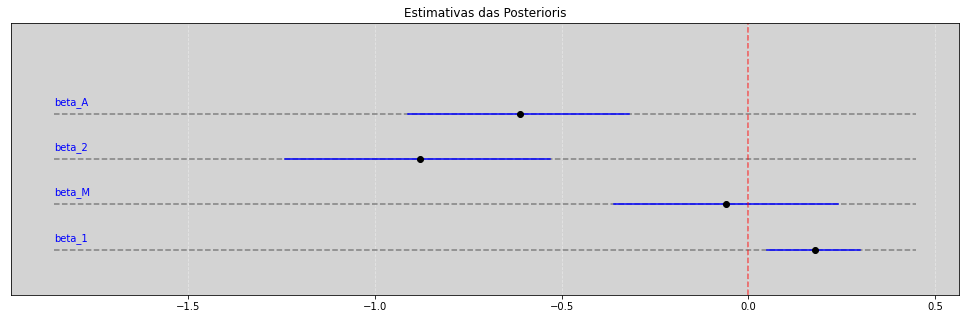

,Mean,Std,5.5%,94.5%
beta_1,0.18,0.06,0.05,0.30
beta_M,-0.06,0.16,-0.36,0.24
beta_2,-0.88,0.18,-1.24,-0.53
beta_A,-0.61,0.16,-0.91,-0.32


In [20]:
vars_all = ['beta_1', 'beta_M', 'beta_2', 'beta_A'] 

#  Legendas
# ------------
# beta_2 == D ~ A   
# beta_A ==> D ~ A + M 

# beta_M ==> D ~ A + M  
# beta_1 ==> D ~ M  

describe_posteriori(vars_all, 0.945, plot=True)

Quando observando as tabelas acima e comparando com o gráfico, temos que a taxa de casamentos ($\beta_M$), resultante da regressão multipla, tem a sua distribuição à posteriori, com $89\%$ de HPDI, contendo o `zero`. Portanto provávelmente a variável taxa de casamento ($\beta_M$) `não tem impacto casual direto` na taxa de divórcio. 

Ele foi mascarado por que a *mediana das idades dos casamentos* ($A$) é uma variável que influência tanto a *taxa de divórcio* quanto a *taxa de casamentos*.

No gráfico acima fica claro que o modelo *beta_1*, no modelo $D ~ M$, nos diz que *taxa de casamento* tem uma associação positiva com a *taxa de divórcio*, o que era de se esperar pelos nossos entendimentos sobre como poderia funcionar esse evento. 

Entretanto, como a regressão múltipla podemos ver que a posteriori atinge o zero, e assim não podemos perceber que *provavelmente* não existe uma associação entre a *taxa de casamentos* e a *taxa de divórcios*.

Isso é uma boa coisa que a regressão múltipla pode fazer por nós! Eu acredito que `essa é realmente a relação causal` que temos aqui. 

Assim, nosso *DAG* provavelmente seria dessa forma:

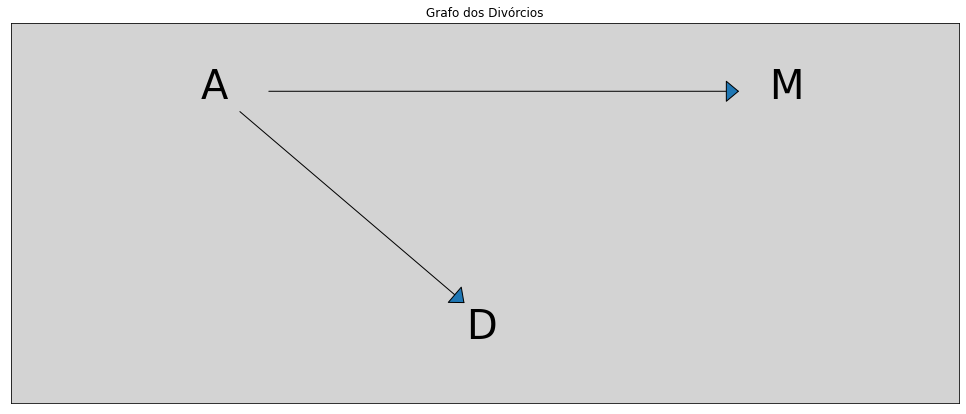

In [21]:
# =======================================
#   Construindo o desenho de um DAG 
# =======================================

# Esses códigos devem estar invisíveis no jupyter-book 

plt.figure(figsize=(17, 7))

plt.xlim(1, 2)
plt.ylim(0, 1)

size=40

#-------------------------
# DAG - Direita
#-------------------------

plt.annotate('A', (1.2, 0.8), fontsize=size)
plt.annotate('M', (1.8, 0.8), fontsize=size)
plt.annotate('D', (1.48, 0.17), fontsize=size)

plt.title('Grafo dos Divórcios')

# Edge: M <---> D
#lt.annotate("", 
#             xytext=(1.79, 0.79), xy=(1.53, 0.265) ,
#             arrowprops=dict(arrowstyle="-|>,  head_width=1, head_length=1.2"))

# Edge: A <---> M
plt.annotate("", 
             xytext=(1.27, 0.82), xy=(1.77, 0.82),
             arrowprops=dict(arrowstyle="-|>,  head_width=1, head_length=1.2"))

# Edge: A <---> D
plt.annotate("", 
             xytext=(1.24, 0.77), xy=(1.48, 0.26),
             arrowprops=dict(arrowstyle="-|>,  head_width=1, head_length=1.2"))

# Remover os valores dos eixos
plt.yticks([])
plt.xticks([])

plt.show()

Assim, como não temos uma relação forte da *taxa de casamentos* ($M$) com a variável *taxa de divórcios* ($D$), a representação de nosso *DAG*, ou seja, a representação da causalidade, poderá ser mapeada de acordo com o gráfico acima. 

Mas vamos explorar um pouco melhor o significado dessa abordagem.

### Regressão Múltipla

- Uma vez que nós conhecemos $A$, *mediana das idades dos casamentos*, existe apenas um pequeno valor adicional de conhecimento sobre $D$ que está contido em $M$, a *taxa de casamento*.

Então podemos interpretar isso da seguinte forma, ao conhecermos os valores de $A$ implica que o conhecimento de $M$ não vai nos ajudar muito mais a entender $D$. Isso coincide com *DAG* acima, onde não há relação causal da *taxa de casamentos* para a *taxa de divórcios*.



- Uma vez que nós conhecemos a $M$, taxa de casamentos, há muito valor em conhecer também $A$, mediana das idades dos casamentos. 

Isso funciona na outra direção, pois a *mediana das idades dos casamentos* ($A$) é uma `causa` comum da *taxa de casamentos* ($M$).


- Se nós não conhecermos a *mediana das idades dos casamentos* ($A$) em algum estado, ainda é útil conhecer a *taxa de casamentos* ($M$).

Saber sobre a *taxa de casamentos* é útil e importante pois isso pode nos dá informações adicionais. Essa informação vem de outra relação causal e não da uma informação causal direta entre as variáveis.

```{note}
Esse é nosso negócio aqui. A inferência! Descobrir a diferença entre essas coisas.
```

Se nós apenas quisermos fazer uma previsão e não nos importarmos com a inferência causal, a *taxa de casamento* é útil e ajudará a prever as coisas. Mas, por outro lado, não nos ajuda a fazer `interevenções no mundo real`, porque se quisermos mudar a *taxa de divórcios* ($D$) nos estado manipulando a *taxa de casamento* ($M$) não teria nenhum efeito.

Simplesmente por que não é assim que as coisas funcionam. `A maquinaria de causalidade natural dos divórcios não apresenta essa ligação` entre da *taxa de casamentos* para a *taxa de divórcios*.

Assim, para efeito de políticas públicas, é necessário focar nas alterações na *mediana da idade dos casamentos* para verificar os efeitos na *taxa de divórcios*.

Assim precisamos ser claros se queremos **apenas** prever as coisas. Se quisermos também inteferir as relações causais, devemos fazer a previsão das relações causais para que possamos fazer as intervenções. `Uma intervenção requer um verdadeiro entendimento da causalidade do sistema`. 

```{warning}
Uma previsão não tem o poder de fazer tais intervenções causais.
```

Isso é o grande terror da ciência, podemos fazer previsões realmente boas sem entendermos nada! Lembra dos modelos *geocêntricos*. `Modelo estatísticos corretos não são suficientes para descobrir relações causais`, então precisamos de algo extra!

## Regressão Múltipla

Parei em regressão múltipla 31:10